### One-Dimensional Aggregation: Paper Metadata

In [1]:
exportdate = 20180325

The usual preparations...

In [2]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np

In [3]:
%matplotlib notebook

In [4]:
sns.set_style('darkgrid')

In [5]:
df = pd.read_csv(f'../analysis/{exportdate}repract_evaluation_counts_with_papermeta.csv')
df.head(1)

,PaperId,Essential,Worthwhile,Unimportant,Unwise,ZeroRating,NotShown,PosRatings,NegRatings,TotalRatings,Venue,Year,TotalPages,IndTrack,AcadVsInd,Title,Authors,Summary
0,248,2,5,6,0,0,141,7,6,13,ICSE,2014,10,No,Academic,Requirements fixation,"Rahul Mohanani, Paul Ralph, Ben Shreeve",An experiment with students on the effects of ...


In [6]:
nozeroes = df[[col for col in df.columns if col not in ['ZeroRating', 'NotShown']]]
nozeroes.head(1)

,PaperId,Essential,Worthwhile,Unimportant,Unwise,PosRatings,NegRatings,TotalRatings,Venue,Year,TotalPages,IndTrack,AcadVsInd,Title,Authors,Summary
0,248,2,5,6,0,7,6,13,ICSE,2014,10,No,Academic,Requirements fixation,"Rahul Mohanani, Paul Ralph, Ben Shreeve",An experiment with students on the effects of ...


In [7]:
def percentages(df, totalscolumn):
    ndf = pd.DataFrame(df, copy=True)
    for col in df.columns:
        if col != totalscolumn:
            ndf[col] = df[col] / df[totalscolumn]
    return ndf
    
def colslice(df, fro, to):
    return df[list(df.columns.values)[fro:to]]

def graphic(df, fro, to, groupby, 
            absolute=False, sortby='PosRatings', bbox_to_anchor=None, groupbyname=None):
    if not absolute:
        colslice(
            percentages(
                nozeroes.groupby(groupby).sum()[
                    list(df.columns.values)[1:8]], 'TotalRatings'
            ).sort_values(sortby, ascending=False), fro, to
        ).plot.barh(rot=0, stacked=True, colormap='bwr')
        plt.xlim(0,1)
    else:
        colslice(
            nozeroes.groupby(groupby).sum()[
                    list(df.columns.values)[1:8]].sort_values(sortby, ascending=False), fro, to
        ).plot.barh(rot=0, stacked=True, colormap='bwr')
    plt.title(f'Evaluations by {groupby if not groupbyname else groupbyname}')
    plt.ylabel('')
    plt.xlabel(f'{"Percentage" if not absolute else "Number"} of Evaluations')
    plt.legend(loc='upper right', bbox_to_anchor=bbox_to_anchor);

In [8]:
ratings = ['Essential', 'Worthwhile', 'Unimportant', 'Unwise']

### By Conference Venue

In [9]:
percentages(df.groupby('Venue').sum()[list(df.columns.values)[1:10]]
           , 'TotalRatings').sort_values('PosRatings', ascending=False)

,Essential,Worthwhile,Unimportant,Unwise,ZeroRating,NotShown,PosRatings,NegRatings,TotalRatings
Venue,,,,,,,,,
REFSQ,0.267686,0.489484,0.212237,0.030593,0.066922,31.342256,0.757170,0.242830,523
RE,0.229305,0.471026,0.253311,0.046358,0.071192,29.350993,0.700331,0.299669,1208
ICSE,0.267380,0.411765,0.278075,0.042781,0.058824,30.224599,0.679144,0.320856,187
FSE,0.218750,0.437500,0.281250,0.062500,0.125000,36.375000,0.656250,0.343750,32
ESEM,0.176471,0.428571,0.336134,0.058824,0.058824,26.672269,0.605042,0.394958,119
ESEC/FSE,0.277778,0.305556,0.333333,0.083333,0.055556,32.277778,0.583333,0.416667,36


Counts

<IPython.core.display.Javascript object>


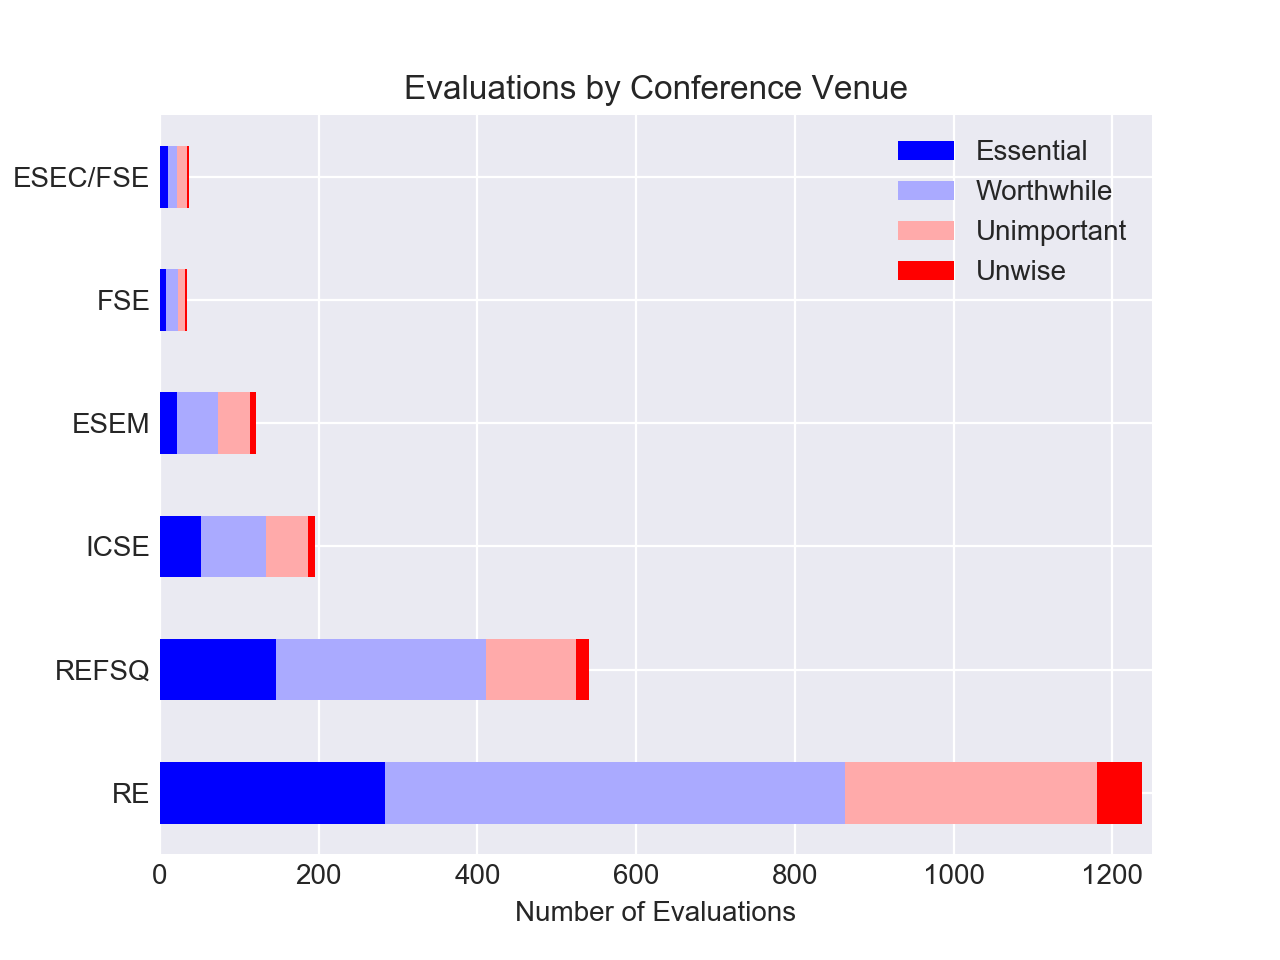

In [9]:
graphic(nozeroes, 0,4,'Venue', absolute=True, groupbyname='Conference Venue')
plt.xlim(0,1250);

Percentages

<IPython.core.display.Javascript object>


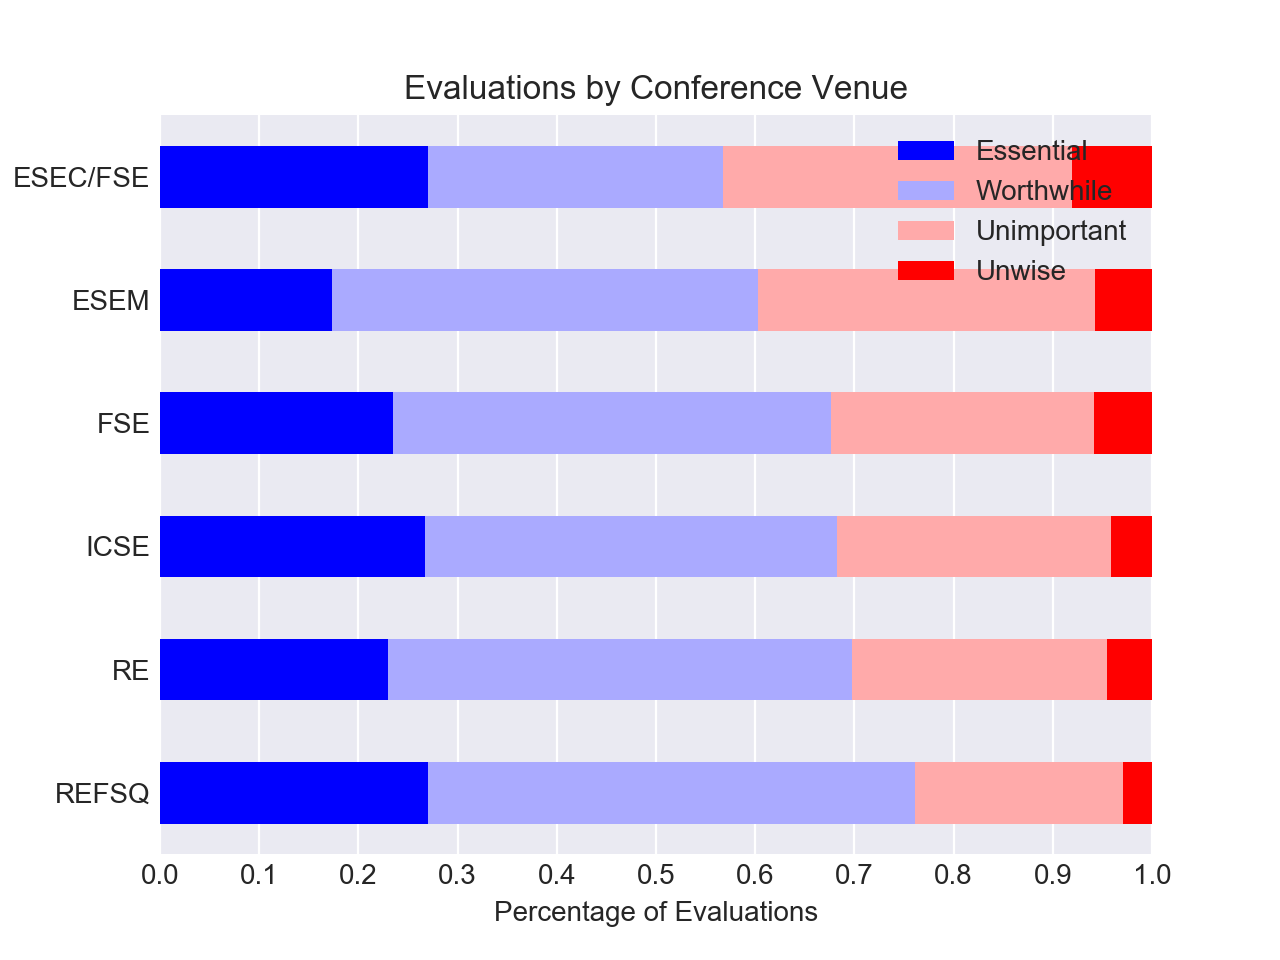

In [10]:
graphic(nozeroes, 0,4,'Venue', groupbyname='Conference Venue')
plt.xticks(np.arange(0,1.1,0.1));

### By Year

In [11]:
percentages(df.groupby('Year').sum()[list(df.columns.values)[1:10]]
           , 'TotalRatings').sort_values('PosRatings', ascending=False)

,Essential,Worthwhile,Unimportant,Unwise,ZeroRating,NotShown,PosRatings,NegRatings,TotalRatings
Year,,,,,,,,,
2010,0.269592,0.492163,0.200627,0.037618,0.065831,28.382445,0.761755,0.238245,319
2011,0.263359,0.477099,0.221374,0.038168,0.095420,28.881679,0.740458,0.259542,262
2012,0.218978,0.518248,0.226277,0.036496,0.054745,30.981752,0.737226,0.262774,274
2013,0.262570,0.424581,0.265363,0.047486,0.075419,29.896648,0.687151,0.312849,358
2015,0.228571,0.453061,0.281633,0.036735,0.044898,29.755102,0.681633,0.318367,245
2014,0.224658,0.454795,0.271233,0.049315,0.063014,32.268493,0.679452,0.320548,365
2016,0.217009,0.439883,0.296188,0.046921,0.070381,28.736070,0.656891,0.343109,341


Counts

<IPython.core.display.Javascript object>


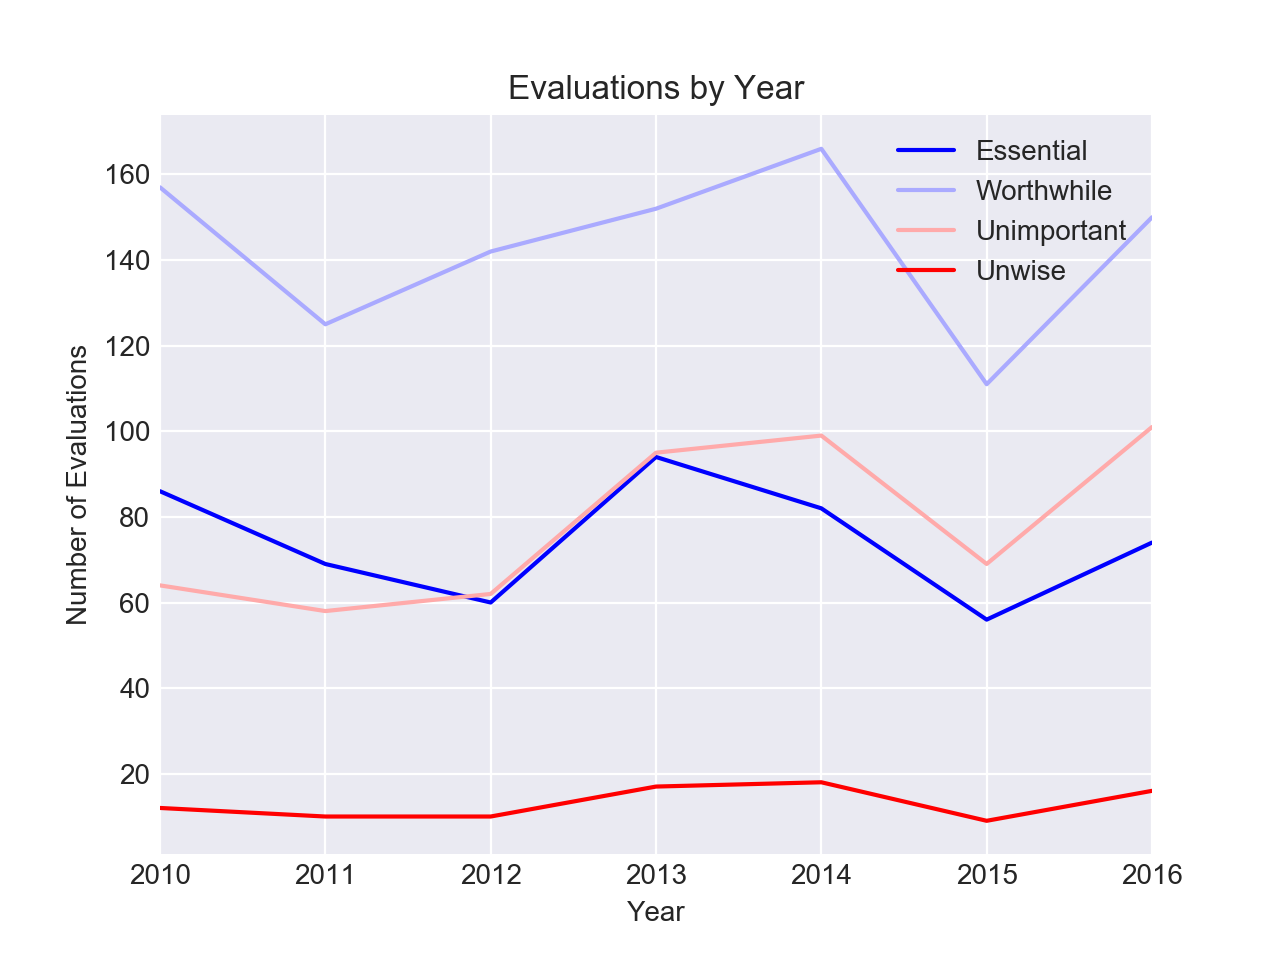

In [12]:
df.groupby('Year').sum()[list(df.columns.values)[1:10]][ratings].plot(cmap='bwr')
plt.xlim(2010,2016)
plt.ylabel('Number of Evaluations')
plt.title('Evaluations by Year');

Percentages

<IPython.core.display.Javascript object>


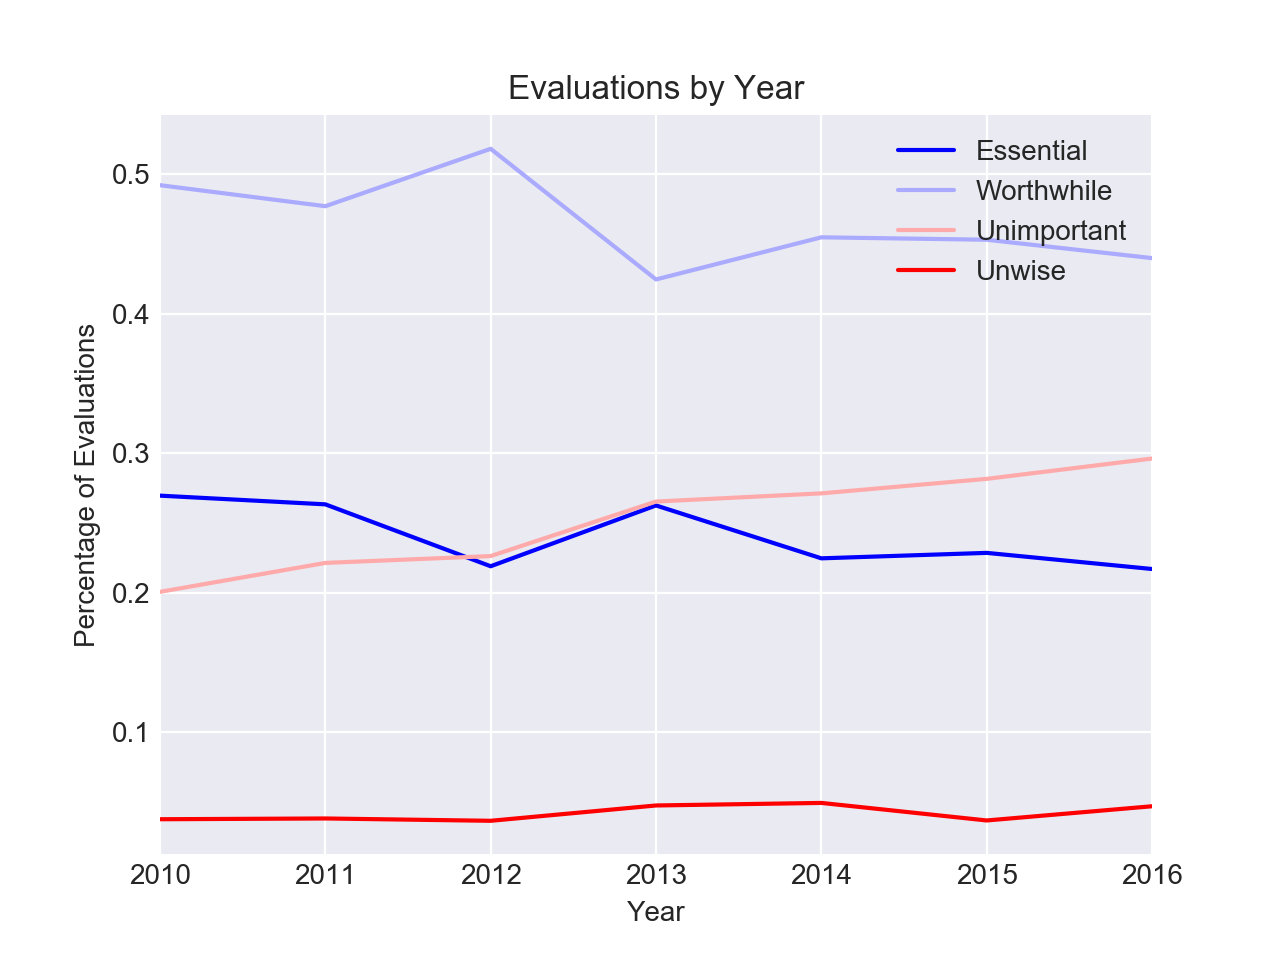

In [13]:
percentages(df.groupby('Year').sum()[list(df.columns.values)[1:10]]
           , 'TotalRatings')[ratings].plot(cmap='bwr')
plt.xlim(2010,2016)
plt.ylabel('Percentage of Evaluations')
plt.title('Evaluations by Year');

### Industry Track?

In [15]:
percentages(df.groupby('IndTrack').sum()[list(df.columns.values)[1:10]]
           , 'TotalRatings').drop('NotShown', axis=1).sort_values('PosRatings', ascending=False)

,Essential,Worthwhile,Unimportant,Unwise,ZeroRating,PosRatings,NegRatings,TotalRatings
IndTrack,,,,,,,,
Yes,0.282805,0.454751,0.223982,0.038462,0.056561,0.737557,0.262443,442
No,0.229965,0.465738,0.260743,0.043554,0.070267,0.695703,0.304297,1722


Counts

<IPython.core.display.Javascript object>


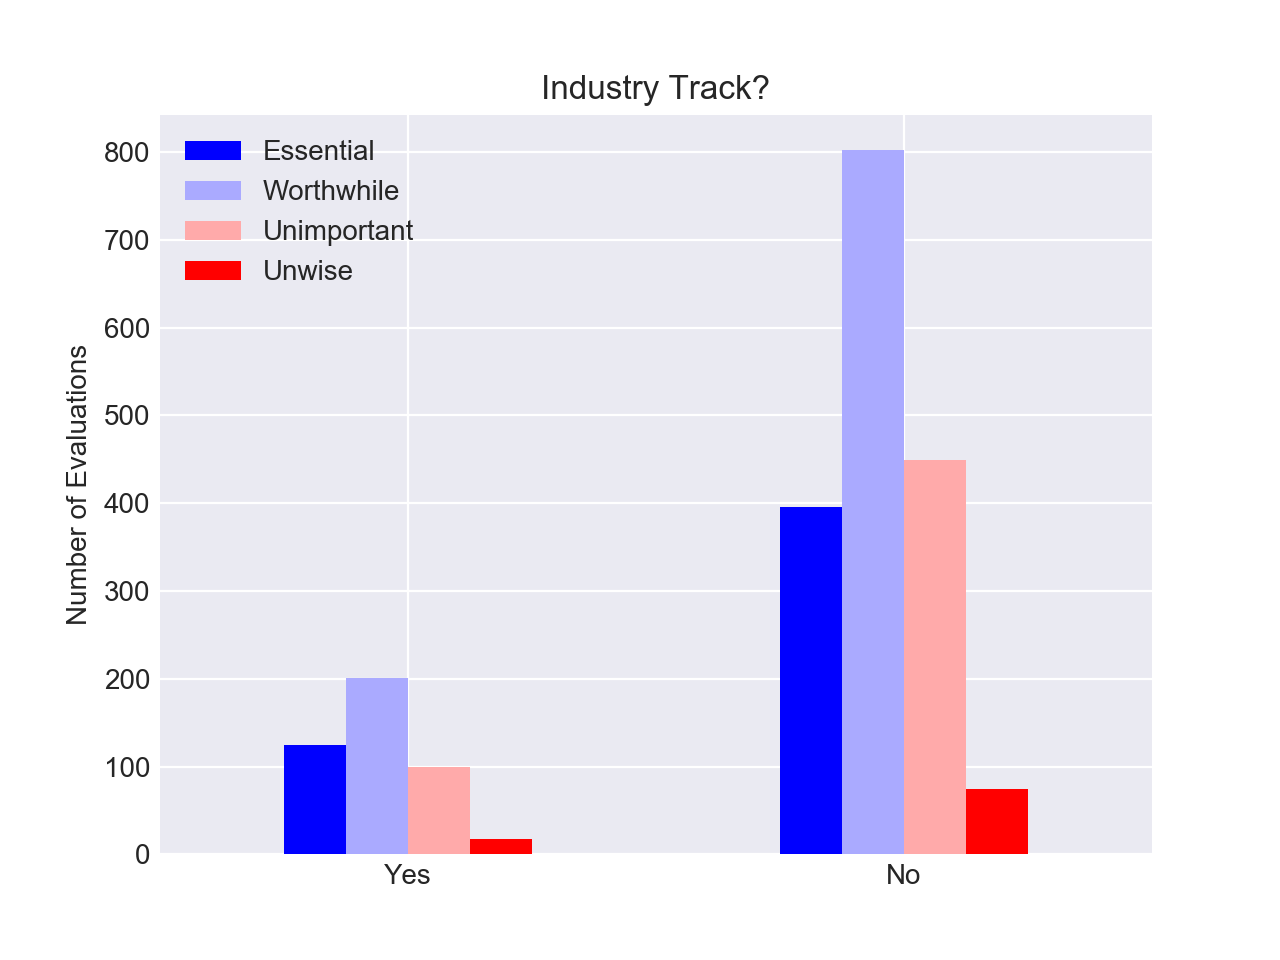

In [16]:
colslice(
    nozeroes.groupby('IndTrack').sum()[
            list(nozeroes.columns.values)[1:8]].sort_values('PosRatings', ascending=True), 0,4
).plot.bar(rot=0, stacked=False, cmap='bwr')
plt.xlabel('')
plt.ylabel('Number of Evaluations')
plt.title('Industry Track?')
plt.legend(loc='upper left');

Percentages

<IPython.core.display.Javascript object>


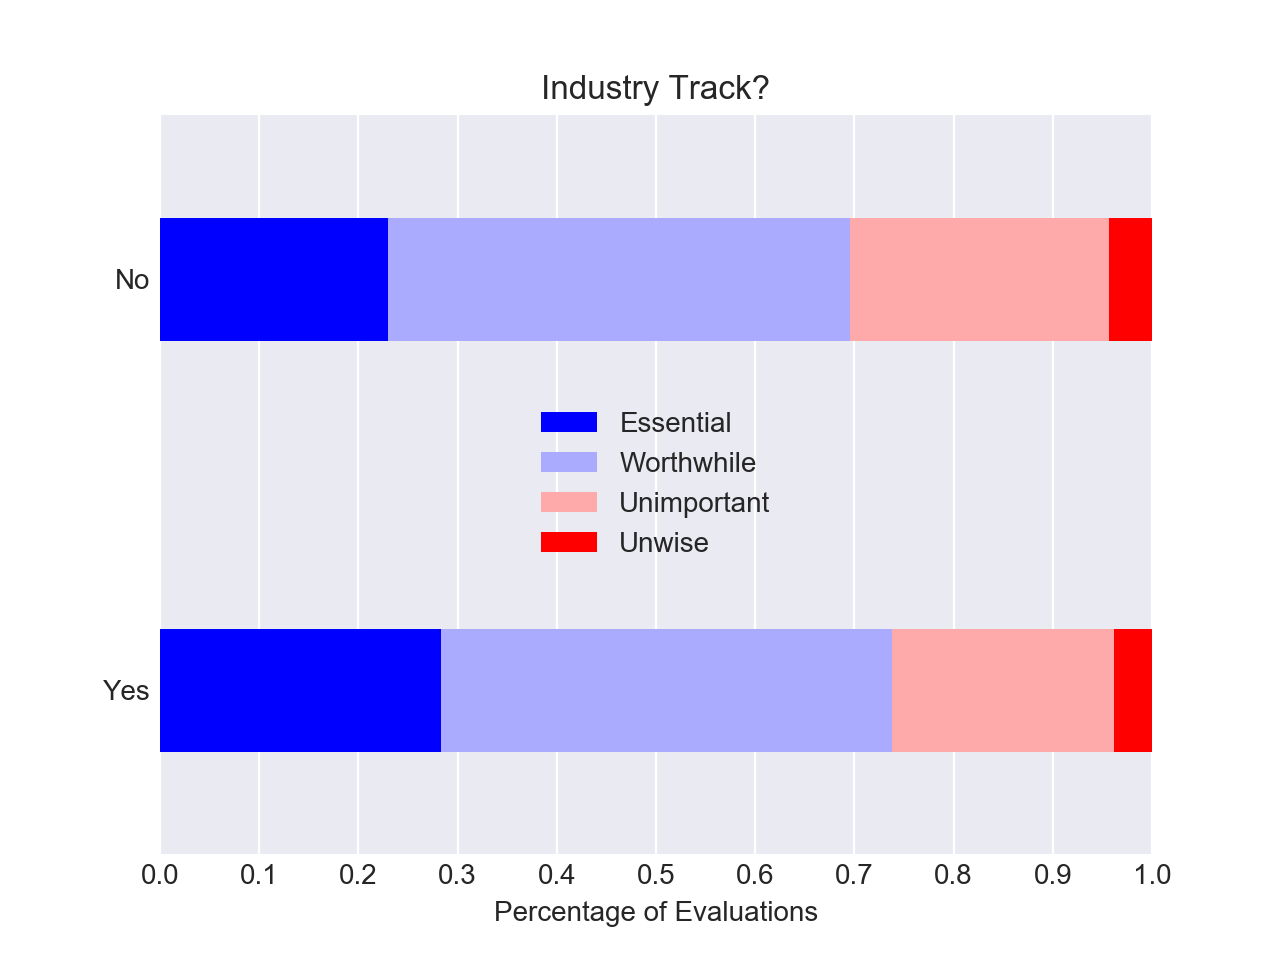

In [17]:
colslice(
    percentages(
        nozeroes.groupby('IndTrack').sum()[
            list(nozeroes.columns.values)[1:8]], 'TotalRatings'
    ).sort_values('PosRatings', ascending=False), 0,4
).plot.barh(rot=0, stacked=True, cmap='bwr', width=0.3)
plt.ylabel('')
plt.xlim(0,1)
plt.xticks(np.arange(0,1.1,0.1))
plt.xlabel('Percentage of Evaluations')
plt.title('Industry Track?')
plt.legend(loc='center');

### Academic or Industry Affiliation?

In [18]:
percentages(df.groupby('AcadVsInd').sum()[list(df.columns.values)[1:10]]
           , 'TotalRatings').drop('NotShown',axis=1).sort_values('PosRatings', ascending=False)

,Essential,Worthwhile,Unimportant,Unwise,ZeroRating,PosRatings,NegRatings,TotalRatings
AcadVsInd,,,,,,,,
Mixed,0.241975,0.503704,0.217284,0.037037,0.059259,0.745679,0.254321,405
Industry,0.297619,0.440476,0.214286,0.047619,0.047619,0.738095,0.261905,168
Academic,0.234444,0.455688,0.266499,0.043369,0.071653,0.690132,0.309868,1591


Counts

<IPython.core.display.Javascript object>


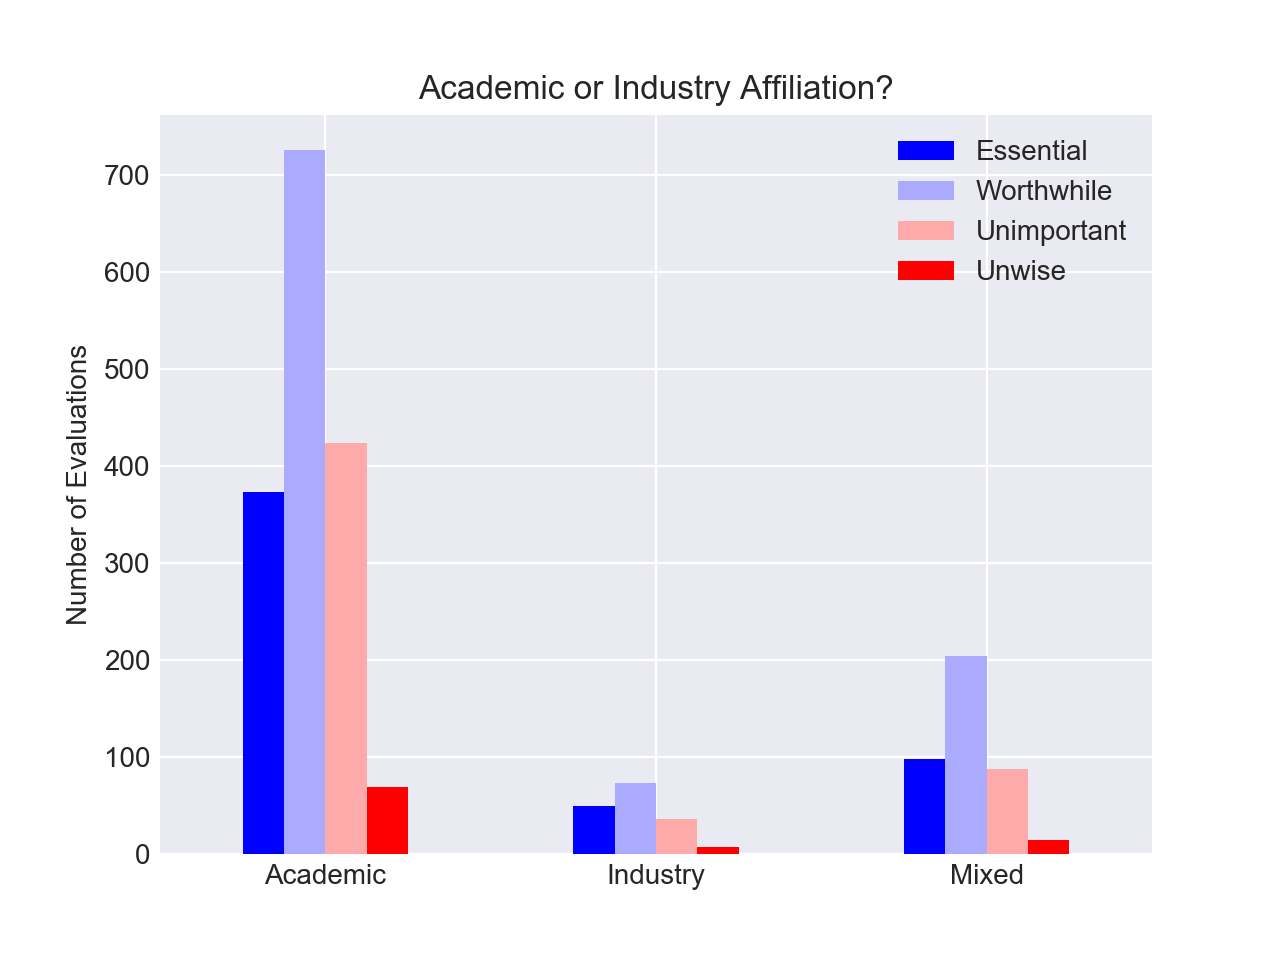

In [19]:
colslice(
    nozeroes.groupby('AcadVsInd').sum()[
            list(nozeroes.columns.values)[1:8]], 0,4
).plot.bar(rot=0, stacked=False, cmap='bwr')
plt.xlabel('')
plt.ylabel('Number of Evaluations')
plt.title('Academic or Industry Affiliation?')
plt.legend(loc='upper right');

Percentages

<IPython.core.display.Javascript object>


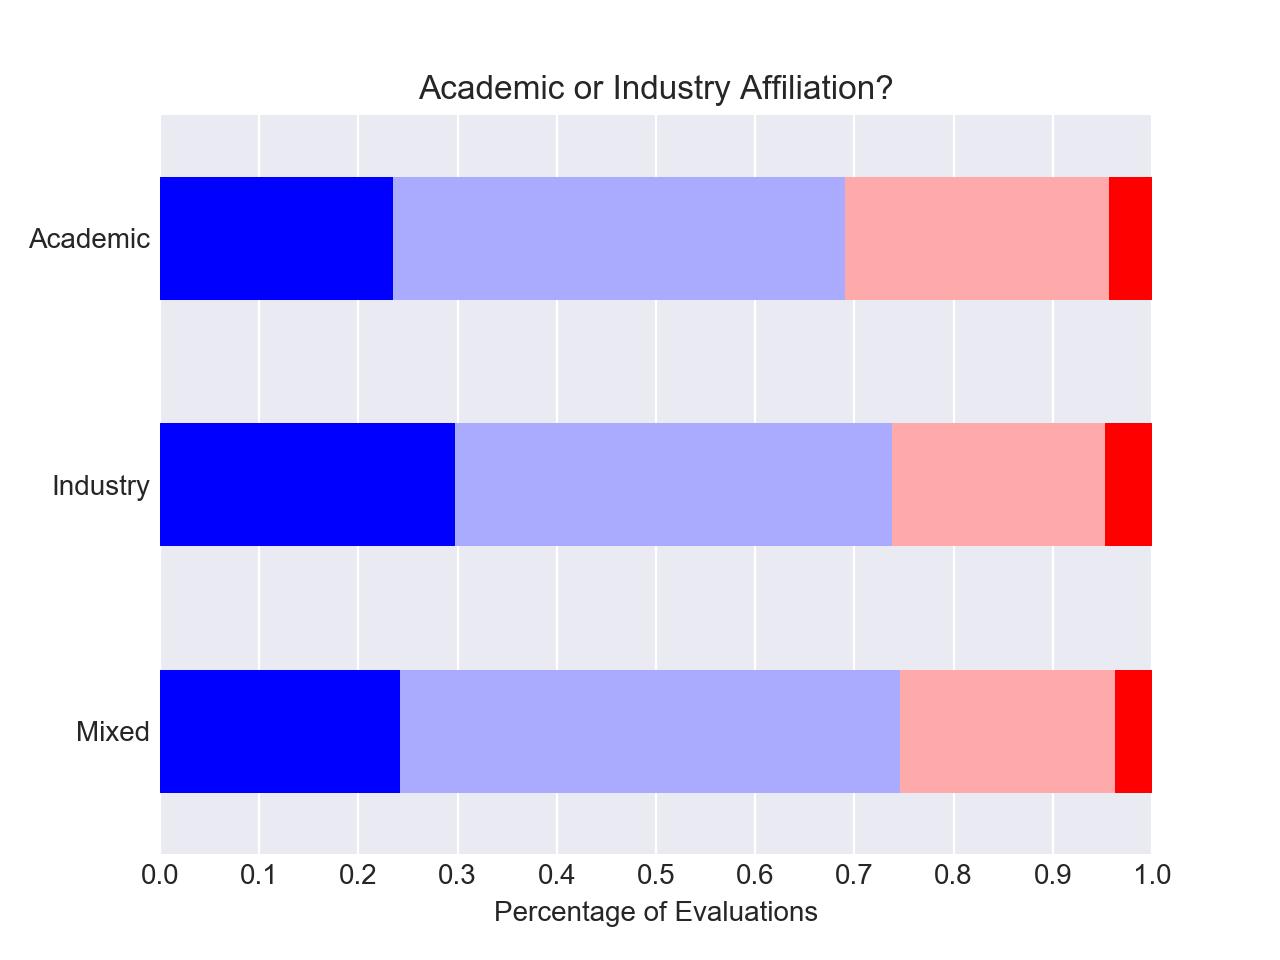

In [20]:
graphic(nozeroes, 0,4,'AcadVsInd')
plt.title('Academic or Industry Affiliation?')
plt.legend([])
plt.xticks(np.arange(0,1.1,0.1));

The End.